In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sci378 import *

Version:  0.0.18


In [3]:
from lmfit import *

In [4]:
data=pd.read_csv('data/station.csv')

In [5]:
data

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
0,1997,999.90,999.90,999.90,999.90,999.90,999.90,999.90,19.40,19.33,17.61,12.79,10.61,999.90,999.90,999.90,16.58,999.90
1,1998,10.28,12.64,13.64,10.77,15.84,17.64,20.56,21.04,18.24,14.80,11.91,8.27,11.18,13.42,19.75,14.98,14.83
2,1999,9.17,8.63,11.71,13.94,16.69,20.05,22.24,21.09,19.43,16.21,11.56,9.75,8.69,14.11,21.13,15.73,14.92
3,2000,7.52,11.52,13.32,11.42,15.52,19.72,19.82,20.12,18.22,14.72,11.62,11.52,9.60,13.42,19.89,14.85,14.44
4,2001,10.02,10.96,12.84,13.11,15.52,18.62,18.72,19.72,19.82,16.92,10.82,8.32,10.83,13.82,19.02,15.85,14.88
5,2002,10.82,10.92,12.82,12.92,14.12,16.92,19.02,19.42,18.42,17.02,12.22,11.92,10.02,13.29,18.45,15.89,14.41
6,2003,8.92,9.32,13.02,13.62,16.62,19.42,19.22,22.72,20.52,15.02,12.82,9.82,10.05,14.42,20.45,16.12,15.26
7,2004,10.22,10.32,10.82,12.82,15.82,20.32,20.12,19.82,19.52,15.02,11.32,8.92,10.12,13.15,20.09,15.29,14.66
8,2005,8.12,7.82,12.52,13.42,16.92,20.42,20.82,23.67,18.92,17.12,11.72,9.62,8.29,14.29,21.64,15.92,15.03
9,2006,7.82,8.82,11.82,14.62,17.22,19.42,21.92,22.12,19.12,17.72,14.52,9.32,8.75,14.55,21.15,17.12,15.39


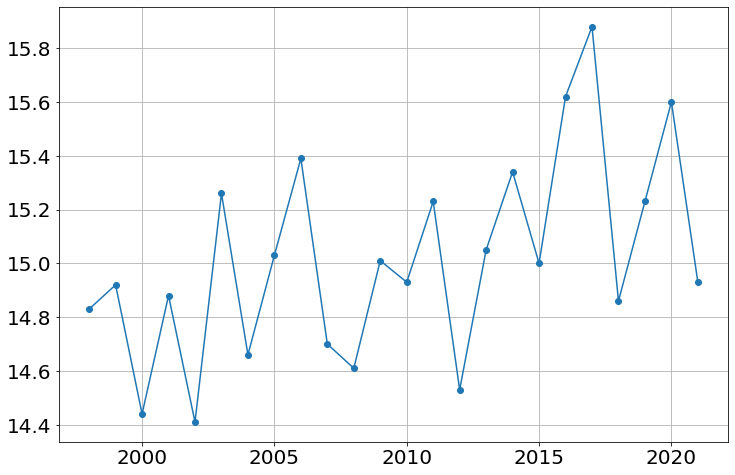

In [7]:
x=data['YEAR']
y=data['metANN']

x=x[y<200]
y=y[y<200]


plot(x,y,'-o')